In [1]:
import pandas as pd

data = pd.read_csv("../Scrappers/RegressionData.csv")

In [2]:
data.head()

,Unnamed: 0,Date,Contraction,Unemployment,One Year Bond,Ten Year Bond,GDP,Discount Rate
0,0,1967-10-01,0.0,3.9,5.56,5.64,4615.853,4.23
1,1,1968-01-01,0.0,3.7,5.47,5.61,4709.993,4.55
2,2,1968-04-01,0.0,3.6,5.94,5.74,4788.688,5.40
3,3,1968-07-01,0.0,3.5,5.51,5.46,4825.799,5.41
4,4,1968-10-01,0.0,3.4,5.84,5.77,4844.779,5.29


In [3]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

data.head()

C:\Users\Julie\Anaconda3\envs\PythonData3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


,Unnamed: 0,Date,Contraction,Unemployment,One Year Bond,Ten Year Bond,GDP,Discount Rate
0,0,1967-10-01,0.0,3.9,5.56,5.64,4615.853,4.23
1,1,1968-01-01,0.0,3.7,5.47,5.61,4709.993,4.55
2,2,1968-04-01,0.0,3.6,5.94,5.74,4788.688,5.40
3,3,1968-07-01,0.0,3.5,5.51,5.46,4825.799,5.41
4,4,1968-10-01,0.0,3.4,5.84,5.77,4844.779,5.29


In [4]:
#data["GDP pct change"] = data["GDP pct change"]/100
data_list = data["GDP"].values
train = data_list[0:192]
test = data_list[192:]

In [5]:
x_train = []
y_train = []

sequence_length = 80

for i in range(0, len(train) - sequence_length):
    x_train.append(train[i: i + sequence_length])
    y_train.append(train[i + sequence_length])
    
x_train

[array([4615.853, 4709.993, 4788.688, 4825.799, 4844.779, 4920.605,
        4935.564, 4968.164, 4943.935, 4936.594, 4943.6  , 4989.159,
        4935.693, 5069.746, 5097.179, 5139.128, 5151.245, 5245.974,
        5365.045, 5415.712, 5506.396, 5642.669, 5704.098, 5674.1  ,
        5727.96 , 5678.713, 5692.21 , 5638.411, 5616.526, 5548.156,
        5587.8  , 5683.444, 5759.972, 5889.5  , 5932.711, 5965.265,
        6008.504, 6079.494, 6197.686, 6309.514, 6309.652, 6329.791,
        6574.39 , 6640.497, 6729.755, 6741.854, 6749.063, 6799.2  ,
        6816.203, 6837.641, 6696.753, 6688.794, 6813.535, 6947.042,
        6895.559, 6978.135, 6902.105, 6794.878, 6825.876, 6799.781,
        6802.497, 6892.144, 7048.982, 7189.896, 7339.893, 7483.371,
        7612.668, 7686.059, 7749.151, 7824.247, 7893.136, 8013.674,
        8073.239, 8148.603, 8185.303, 8263.639, 8308.021, 8369.93 ,
        8460.233, 8533.635]),
 array([4709.993, 4788.688, 4825.799, 4844.779, 4920.605, 4935.564,
        4968.164, 

In [6]:
import numpy as np

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))


In [8]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=5, batch_size=1, verbose=2)


inputs = data["GDP"][len(data['GDP']) - len(test) - sequence_length:].values
inputs = inputs.reshape(-1,1)


x_test = []
for i in range(sequence_length,inputs.shape[0]):
    x_test.append(inputs[i-sequence_length:i,0])
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
GDP_pct_change = model.predict(x_test)

Epoch 1/5
 - 9s - loss: 177504699.2857
Epoch 2/5
 - 8s - loss: 177295281.5000
Epoch 3/5
 - 8s - loss: 177138889.6429
Epoch 4/5
 - 7s - loss: 176986807.2857
Epoch 5/5
 - 8s - loss: 176836828.8571


In [10]:
#GDP_pct_change
GDP_pct_change = np.reshape(GDP_pct_change, GDP_pct_change.shape[0])

In [11]:
last_64 = pd.DataFrame()

In [12]:
last_64["Observed"] = data["GDP"][192:256]


In [13]:
last_64["Date"] = data["Date"][192:256]
last_64.index=last_64['Date']
last_64["Predicted"] = GDP_pct_change
last_64["Predicted"] = last_64['Predicted']

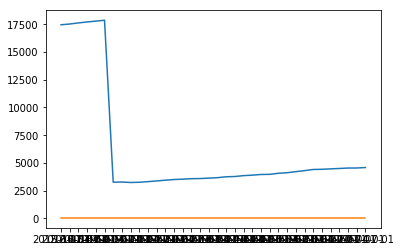

In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(last_64['Date'], last_64[['Observed', 'Predicted']])
#ax.locator_params(axis='x', nbins=10)
plt.show()